# Create MLP and add more context, not just one symbol (based on Andrej Karpathy educational video)

In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in all the words

words = open('./data/names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
# build the vocabulary of characters and mappings to/from integers

chars = sorted(list(set(''.join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
# build the dataset

block_size = 3 # context length
X, Y = [], []

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for i, ch in enumerate(w + '.'):
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [6]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [7]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

# let's build a look-up table: row at index 'k' will have an embedding for a character #k


In [8]:
# let's build a look-up table: row at index 'k' will have an embedding for a character #k

C = torch.randn((27, 2))

In [9]:
# the first approach how to select an embedding for character #5 in a look-up table

C[5]

tensor([0.7065, 0.8260])

In [10]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [11]:
# the second approach how to select an embedding for character #5 in a look-up table. 
# This approach allows us to construct a picking of the needed embedding from a look-up table as the first layer of our NN

F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.7065, 0.8260])

In [12]:
# we'll use the first approach (indexing with an integer). but we do it for all characters at once

C[X]


tensor([[[-2.5183, -0.4778],
         [-2.5183, -0.4778],
         [-2.5183, -0.4778]],

        [[-2.5183, -0.4778],
         [-2.5183, -0.4778],
         [ 0.7065,  0.8260]],

        [[-2.5183, -0.4778],
         [ 0.7065,  0.8260],
         [ 1.1812, -0.2829]],

        [[ 0.7065,  0.8260],
         [ 1.1812, -0.2829],
         [ 1.1812, -0.2829]],

        [[ 1.1812, -0.2829],
         [ 1.1812, -0.2829],
         [-1.6702, -0.8274]],

        [[-2.5183, -0.4778],
         [-2.5183, -0.4778],
         [-2.5183, -0.4778]],

        [[-2.5183, -0.4778],
         [-2.5183, -0.4778],
         [-0.8426,  0.6823]],

        [[-2.5183, -0.4778],
         [-0.8426,  0.6823],
         [ 1.8497,  0.3276]],

        [[-0.8426,  0.6823],
         [ 1.8497,  0.3276],
         [-0.0112,  0.2581]],

        [[ 1.8497,  0.3276],
         [-0.0112,  0.2581],
         [-1.1715, -2.2935]],

        [[-0.0112,  0.2581],
         [-1.1715, -2.2935],
         [-0.0112,  0.2581]],

        [[-1.1715, -2

In [13]:
C[X].shape

torch.Size([32, 3, 2])

In [14]:
emb = C[X] 
# a tensor with our embeddings (an embedding vector for each example (32), example consists of 3 symbols and the size of an embedding is 2)
emb.shape

torch.Size([32, 3, 2])

In [15]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [16]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [17]:
# we need to transform [32, 3, 2] to [32, 6]

In [18]:
# the first way to do it 

torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [19]:
# the second way to do it

torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [20]:
# the third way to do it (the best one)

# let's see an synthetic example

a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [21]:
a.view((3, 6))

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

In [22]:
a.view((2, 9))

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [23]:
a.view((3, 3, 2))

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [24]:
# so we can do

emb.view(32, 6) @ W1 + b1

tensor([[ 2.1741, -0.3590, -7.7133,  ..., -3.7324, -7.4733,  0.3070],
        [ 5.8397, -1.3988, -5.8233,  ...,  0.0110, -2.8211, -1.2248],
        [ 5.1430, -1.3875, -0.2293,  ..., -2.7376,  0.0899,  3.8925],
        ...,
        [ 4.6274, -1.1872, -0.4583,  ...,  1.9989, -0.0713, -1.7886],
        [ 3.6425,  1.9899,  5.3372,  ..., -3.2131, -2.5989,  1.3449],
        [-0.7404,  1.4600, -3.0311,  ...,  0.8704, -2.0773, -1.7970]])

# Let's sum up

In [25]:
block_size = 3 # context length
X, Y = [], []

for w in words:
    context = [0] * block_size
    for i, ch in enumerate(w + '.'):
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [26]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2))


W1 = torch.randn((6, 100))
b1 = torch.randn(100)
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

parameters = [C, W1, b1, W2, b2]
print(f"{sum(p.nelement() for p in parameters)}")

3481


In [27]:
for p in parameters:
    p.requires_grad = True

In [28]:
for _ in range(100):

    # forward pass

    emb = C[X]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # when we write -1 it means that pytorch should defer it by itself
    logits = h @ W2 + b2

    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdims=True)
    # loss = -probs[torch.arange(32), Y].log().mean()


    # We can simply call F.cross_entopy(logits, Y) instead of ^

    loss = F.cross_entropy(logits, Y)
    print(loss.item())

    # backward pass

    for p in parameters:
        p.grad = None

    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

54.282432556152344
35.64369201660156
26.32147216796875
20.713668823242188
17.08472442626953
14.643454551696777
12.815634727478027
11.568974494934082
10.399456977844238
9.547335624694824
8.698776245117188
8.17065715789795
7.662575721740723
7.240081310272217
6.909474849700928
6.55351448059082
6.244953155517578
6.004782199859619
5.7417311668396
5.465314865112305
5.376449108123779
5.218635082244873
5.080025672912598
5.03084135055542
4.760841369628906
4.815702438354492
4.564309597015381
4.6368255615234375
4.348458290100098
4.414744853973389
4.24682092666626
4.32249641418457
4.045781135559082
4.091884613037109
4.003969669342041
4.0835347175598145
3.8507964611053467
3.8829877376556396
3.837456226348877
3.928128242492676
3.717005491256714
3.739276170730591
3.716797351837158
3.8136231899261475
3.6153664588928223
3.6237690448760986
3.6187703609466553
3.7145564556121826
3.5283515453338623
3.5235893726348877
3.5328001976013184
3.624485969543457
3.452129364013672
3.43898868560791
3.4582512378692627

# It takes too much time to optimize. Let's do it by mini-batches

In [30]:
torch.randint(0, X.shape[0], (32,)) # this is how we can generate random indexes for a mini-batch size 32

tensor([ 68324, 148211,   9747,   3480,  34724,  88337,  75900,  60681, 172424,
         25637, 102459, 207632, 113804, 181174,   7806,  15031, 194531,  96536,
         63848, 180178, 136696,  82851, 208186, 170943,  17553, 148023, 113420,
        171814, 123062,  41273, 140664, 197223])

In [33]:
for _ in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass

    emb = C[X[ix]]
    print(emb.shape) if _ == 0 else None
    h = emb.view(-1, 6) @ W1 + b1 # when we write -1 it means that pytorch should defer it by itself
    logits = h @ W2 + b2

    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdims=True)
    # loss = -probs[torch.arange(32), Y].log().mean()


    # We can simply call F.cross_entopy(logits, Y) instead of ^

    loss = F.cross_entropy(logits, Y[ix])

    # backward pass

    for p in parameters:
        p.grad = None

    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

print(loss.item())

torch.Size([32, 3, 2])
2.5487782955169678


In [34]:
# loss on all batches

emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
print(h.shape)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss.item()

torch.Size([228146, 100])


2.712885618209839

# How to find a good Learning Rate

In [35]:
lrs = torch.logspace(-3, 0, 1000)

In [36]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((27, 2), generator=g)

W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]
print(f"{sum(p.nelement() for p in parameters)}")

3481


In [37]:
for p in parameters:
    p.requires_grad = True

In [38]:
lri = []
lossi = []

for i in range(1000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass

    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # when we write -1 it means that pytorch should defer it by itself
    logits = h @ W2 + b2

    # counts = logits.exp()
    # probs = counts / counts.sum(1, keepdims=True)
    # loss = -probs[torch.arange(32), Y].log().mean()


    # We can simply call F.cross_entopy(logits, Y) instead of ^

    loss = F.cross_entropy(logits, Y[ix])

    # backward pass

    for p in parameters:
        p.grad = None

    loss.backward()

    print(loss.item())

    #update
    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    # track stats
    lri.append(lr)
    lossi.append(loss.item())

# print(loss.item())

20.960844039916992
18.546348571777344
20.516441345214844
19.940351486206055
17.861026763916016
21.802249908447266
21.005054473876953
20.168628692626953
18.22079849243164
20.703994750976562
16.98980712890625
19.421428680419922
19.92500114440918
20.31179428100586
19.038599014282227
18.777210235595703
17.84814453125
17.515336990356445
17.998689651489258
19.52910804748535
20.738882064819336
16.837528228759766
19.476491928100586
19.561574935913086
18.638635635375977
21.88078498840332
16.833738327026367
18.636194229125977
19.460601806640625
16.54377555847168
17.334209442138672
21.106220245361328
17.11798667907715
16.691913604736328
20.863061904907227
21.363994598388672
18.168304443359375
17.30840492248535
18.22895622253418
18.6236629486084
17.695453643798828
17.792869567871094
18.372262954711914
13.907915115356445
17.413667678833008
17.654251098632812
17.396102905273438
18.61252784729004
17.27504539489746
18.126718521118164
17.73634147644043
20.030925750732422
20.439664840698242
20.584764480

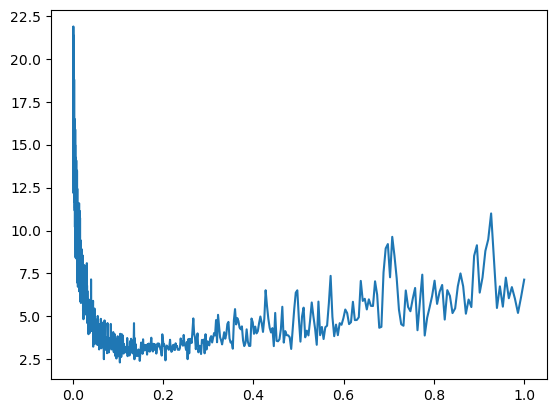

In [39]:
plt.plot(lri, lossi)

# a good learning rate - the elbow rule

# Final NN Pipeline

In [53]:
g = torch.Generator().manual_seed(2147483647)

C = torch.randn((27, 10), generator=g)

W1 = torch.randn((30, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)

parameters = [C, W1, b1, W2, b2]
print(f"{sum(p.nelement() for p in parameters)}")

6097


In [54]:
for p in parameters:
    p.requires_grad = True

In [56]:
for i in range(200000):

    # minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))

    # forward pass

    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # when we write -1 it means that pytorch should defer it by itself
    logits = h @ W2 + b2

    loss = F.cross_entropy(logits, Y[ix])

    # backward pass

    for p in parameters:
        p.grad = None

    loss.backward()

    #update
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad
        
print(loss.item())

2.1773157119750977


# Sampling from our NN

In [57]:
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

carlah.
amille.
khirmish.
taty.
halanna.
jazonte.
delyah.
jareei.
nellara.
chaiiv.
kaleigh.
ham.
joce.
quinn.
shovera.
jadiq.
watthon.
jarynix.
kaellinslee.
dae.
